Input Temperature: 30°C
Calculated Fan Speed: 50.00%


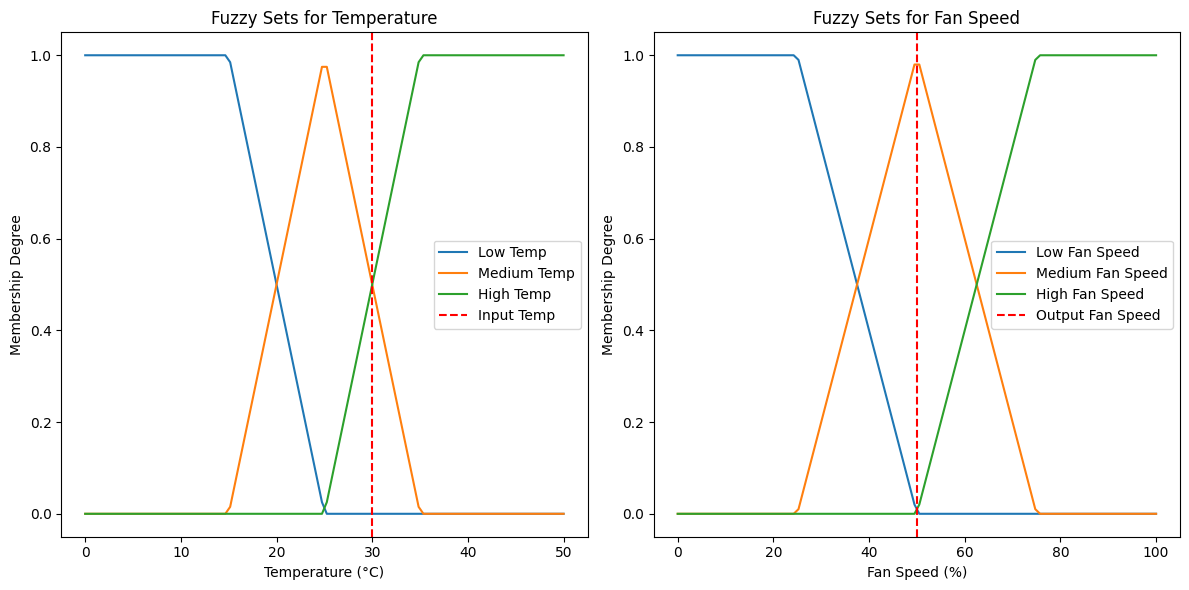

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy sets for temperature
def low_temp(x):
    return max(0, min(1, (25 - x) / 10))

def medium_temp(x):
    return max(0, min((x - 15) / 10, (35 - x) / 10))

def high_temp(x):
    return max(0, min(1, (x - 25) / 10))

# Define fuzzy sets for fan speed
def low_fan_speed(x):
    return max(0, min(1, (50 - x) / 25))

def medium_fan_speed(x):
    return max(0, min((x - 25) / 25, (75 - x) / 25))

def high_fan_speed(x):
    return max(0, min(1, (x - 50) / 25))

# Fuzzy rules
def fuzzy_rules(temp):
    low = low_temp(temp)
    medium = medium_temp(temp)
    high = high_temp(temp)

    low_fan = low_fan_speed(50) * low
    medium_fan = medium_fan_speed(50) * medium
    high_fan = high_fan_speed(50) * high

    return low_fan, medium_fan, high_fan

# Defuzzification using centroid method
def defuzzify(low, medium, high):
    numerator = (low * 25) + (medium * 50) + (high * 75)
    denominator = low + medium + high
    return numerator / denominator if denominator != 0 else 0

# Example usage
temperature_input = 30  # Input temperature
low, medium, high = fuzzy_rules(temperature_input)
fan_speed = defuzzify(low, medium, high)

print(f"Input Temperature: {temperature_input}°C")
print(f"Calculated Fan Speed: {fan_speed:.2f}%")

# Plotting fuzzy sets
x_temp = np.linspace(0, 50, 100)
x_fan = np.linspace(0, 100, 100)

plt.figure(figsize=(12, 6))

# Temperature fuzzy sets
plt.subplot(1, 2, 1)
plt.title('Fuzzy Sets for Temperature')
plt.plot(x_temp, [low_temp(x) for x in x_temp], label='Low Temp')
plt.plot(x_temp, [medium_temp(x) for x in x_temp], label='Medium Temp')
plt.plot(x_temp, [high_temp(x) for x in x_temp], label='High Temp')
plt.axvline(x=temperature_input, color='r', linestyle='--', label='Input Temp')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()

# Fan speed fuzzy sets
plt.subplot(1, 2, 2)
plt.title('Fuzzy Sets for Fan Speed')
plt.plot(x_fan, [low_fan_speed(x) for x in x_fan], label='Low Fan Speed')
plt.plot(x_fan, [medium_fan_speed(x) for x in x_fan], label='Medium Fan Speed')
plt.plot(x_fan, [high_fan_speed(x) for x in x_fan], label='High Fan Speed')
plt.axvline(x=fan_speed, color='r', linestyle='--', label='Output Fan Speed')
plt.xlabel('Fan Speed (%)')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()